# **Import Basic Libraries**

In [1]:
import numpy as np # to perform various mathematical opeartion on arrays
import pandas as pd # for perform wide range function such as analyzing, cleaning, exploring, and manipulating data.
import re # for regular opeartion in python

# **Import Dataset as df**


In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

# **Basic Checks**

In [3]:
# show first 5 rows
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,not available,11.0,NaN,0 to 1 Year Old,"['JMS Crosswalk Mall', 'Reliance Trends Newtow...","['1 Fan', '1 Exhaust Fan', '1 Geyser', '5 Ligh...","['Security / Fire Alarm', 'Lift(s)', 'Maintena..."
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,not available,14.0,NaN,1 to 5 Year Old,"['Ardee Mall', 'Northern Peripheral Road', 'Mp...","['2 Fan', '2 Light', '2 Wardrobe', 'No AC', 'N...","['Intercom Facility', 'Lift(s)', 'Swimming Poo..."
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,servant room,21.0,East,1 to 5 Year Old,"['IFFCO Chowk Metro Station', 'The Esplanade M...","['6 Fan', '18 Light', '4 AC', 'No Bed', 'No Ch...","['Water purifier', 'Centrally Air Conditioned'..."
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,study room,3.0,North-West,5 to 10 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Ce...","['6 Fan', '6 Light', '4 AC', '1 Modular Kitche...","['Security / Fire Alarm', 'Power Back-up', 'In..."
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,"study room,servant room",2.0,North-East,10+ Year Old,"['Sector 55-56 Metro Station', 'Raheja Mall', ...","['5 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stov...","['Feng Shui / Vaastu Compliant', 'Private Gard..."


In [4]:
# shape
df.shape

(3803, 17)

In [5]:
# check for null values
df.isnull().sum()

property_type         0
society               1
sector                0
price                18
price_per_sqft       18
area                 18
areaWithType          0
bedRoom               0
bathroom              0
balcony               0
additionalRoom        0
floorNum             19
facing             1105
agePossession         1
nearbyLocations     177
furnishDetails      981
features            635
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

122

In [7]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global orchard avenue,sector 93,0.4,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,not available,11.0,NaN,0 to 1 Year Old,"['JMS Crosswalk Mall', 'Reliance Trends Newtow...","['1 Fan', '1 Exhaust Fan', '1 Geyser', '5 Ligh...","['Security / Fire Alarm', 'Lift(s)', 'Maintena..."


* In this Feature Engineering we have to focus on 'areaWithType', 'additionalRoom' , 'agePossession',
 'furnishDetails', 'features'

# **1.areaWithType**

In [8]:
df.sample(5)[['area','areaWithType']]

,area,areaWithType
2819,2480.0,Super Built up area 2480(230.4 sq.m.)Built Up ...
165,498.0,Carpet area: 489 (45.43 sq.m.)
2370,1485.0,Super Built up area 1485(137.96 sq.m.)
3607,1187.0,Carpet area: 1187 (110.28 sq.m.)
3618,998.0,Carpet area: 998 (92.72 sq.m.)


**Super Built-up Area**, **Carpet Area**, and **Plot Area** are terms commonly used in real estate to describe different measurements of space within a property. These terms are important for buyers, sellers, and developers to understand the dimensions and usable space of a property. Here's what each term means:

# **1) Super Built-up Area:**
Super Built-up Area, also known as Built-up Area, includes the carpet area along with the thickness of the walls and common areas such as corridors, lobbies, staircases, and other shared spaces. It essentially includes all the space that falls within the perimeter of the building, including areas that are not directly usable by the individual homeowner. This measurement is often used for calculating the cost of a property, including common amenities and shared infrastructure.

# **2) Carpet Area:**
Carpet Area is the actual usable area within an apartment or property. It is the space where you can place a carpet or use for your personal purposes. It does not include the thickness of the walls, balconies, or any common areas. Carpet Area represents the living space available to the homeowner and is the area where furniture and fixtures can be placed.

# **3) Plot Area:**
Plot Area refers to the total land area on which a building or property is constructed. It encompasses the entire land space within the boundaries of the property, including any open spaces, gardens, driveways, and other outdoor areas. Plot Area is relevant for independent houses, villas, and properties that are not part of a larger multi-story building.

In summary:

* Super Built-up Area includes the usable Carpet Area along with the thickness of walls and shared spaces.
* Carpet Area is the actual livable area within the property, excluding walls and common areas.
* Plot Area is the total land area on which a property is constructed, including open spaces and outdoor areas.

It's important for both buyers and sellers to be aware of these terms to accurately understand the size and dimensions of a property, as well as its associated costs. Developers and real estate agents often provide information about these different measurements to potential buyers, helping them make informed decisions based on their space requirements and budget.

In [9]:
# function for extract the super build up area

def get_super_build_up_area(text):
  match = re.search(r'Super Built up area (\d+\.?\d*)', text) # This is a capturing group that matches a numerical value
                                           # \d+: Matches one or more digits.
                                           #\.?: Matches an optional dot (decimal point).
                                           #\d*: Matches zero or more digits after the decimal point.
  if match:
    return float(match.group(1))  #This can be used to extract the numeric value from the regular expression pattern
  return None

In [10]:
# Funtion for extract the build up area or carpet area

def get_area(text,area_type):
  match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)

  if match:
    return float(match.group(1))
  return None

In [11]:
# function checks if the area is provided in sq.m and converts it to sqft if needed

def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [12]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_build_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [13]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
883,1.01,flat,1415.0,Super Built up area 1415(131.46 sq.m.),1415.0,NaN,NaN
1705,3.90,flat,2295.0,Built Up area: 2295 (213.21 sq.m.),NaN,2295.0,NaN
725,6.50,house,4320.0,Plot area 480(401.34 sq.m.),NaN,NaN,NaN
2504,1.35,flat,2700.0,Carpet area: 2700 (250.84 sq.m.),NaN,NaN,2700.0
1821,0.25,flat,600.0,Built Up area: 600 (55.74 sq.m.),NaN,600.0,NaN


In [14]:
df.duplicated().sum()

122

In [15]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [16]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2671,26.00,house,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,NaN,400.0,350.0
2056,0.47,house,443.0,Plot area 49(40.97 sq.m.)Built Up area: 50 sq....,NaN,50.0,48.0
1375,7.10,house,2160.0,Plot area 240(200.67 sq.m.)Built Up area: 239 ...,NaN,239.0,238.0
2164,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
3020,0.62,house,500.0,Plot area 500(46.45 sq.m.)Built Up area: 900 s...,NaN,900.0,480.0


In [17]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [18]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [19]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,8.45,house,359.0,Plot area 359(33.35 sq.m.),NaN,NaN,NaN
8,0.34,house,270.0,Plot area 270(25.08 sq.m.),NaN,NaN,NaN
9,3.25,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
13,3.25,house,981.0,Plot area 109(91.14 sq.m.),NaN,NaN,NaN
15,1.60,house,508.0,Plot area 60(50.17 sq.m.),NaN,NaN,NaN


In [20]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [21]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [22]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [23]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,8.45,house,359.0,Plot area 359(33.35 sq.m.),NaN,359.0,NaN
8,0.34,house,270.0,Plot area 270(25.08 sq.m.),NaN,270.0,NaN
9,3.25,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.0,NaN
13,3.25,house,981.0,Plot area 109(91.14 sq.m.),NaN,109.0,NaN
15,1.60,house,508.0,Plot area 60(50.17 sq.m.),NaN,60.0,NaN
...,...,...,...,...,...,...,...
3762,NaN,house,NaN,Plot area 240(200.67 sq.m.),NaN,240.0,NaN
3773,31.50,house,9000.0,Plot area 1000(836.13 sq.m.),NaN,1000.0,NaN
3791,7.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.0,NaN
3794,6.25,house,2034.0,Plot area 226(188.96 sq.m.),NaN,226.0,NaN


In [24]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [25]:
all_nan_df['build_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [26]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area,build_up_area
4,8.45,house,359.0,Plot area 359(33.35 sq.m.),NaN,359.0,NaN,359.0
8,0.34,house,270.0,Plot area 270(25.08 sq.m.),NaN,270.0,NaN,270.0
9,3.25,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.0,NaN,1449.0
13,3.25,house,981.0,Plot area 109(91.14 sq.m.),NaN,109.0,NaN,981.0
15,1.60,house,508.0,Plot area 60(50.17 sq.m.),NaN,60.0,NaN,60.0
...,...,...,...,...,...,...,...,...
3762,NaN,house,NaN,Plot area 240(200.67 sq.m.),NaN,240.0,NaN,240.0
3773,31.50,house,9000.0,Plot area 1000(836.13 sq.m.),NaN,1000.0,NaN,9000.0
3791,7.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.0,NaN,3240.0
3794,6.25,house,2034.0,Plot area 226(188.96 sq.m.),NaN,226.0,NaN,2034.0


In [27]:
# update the original dataframe
df.update(all_nan_df)

In [28]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

# **2. additionalRoom**

In [29]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,not available,11.0,NaN,0 to 1 Year Old,"['JMS Crosswalk Mall', 'Reliance Trends Newtow...","['1 Fan', '1 Exhaust Fan', '1 Geyser', '5 Ligh...","['Security / Fire Alarm', 'Lift(s)', 'Maintena...",NaN,NaN,543.57695
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,not available,14.0,NaN,1 to 5 Year Old,"['Ardee Mall', 'Northern Peripheral Road', 'Mp...","['2 Fan', '2 Light', '2 Wardrobe', 'No AC', 'N...","['Intercom Facility', 'Lift(s)', 'Swimming Poo...",569.0,NaN,NaN
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,servant room,21.0,East,1 to 5 Year Old,"['IFFCO Chowk Metro Station', 'The Esplanade M...","['6 Fan', '18 Light', '4 AC', 'No Bed', 'No Ch...","['Water purifier', 'Centrally Air Conditioned'...",3150.0,NaN,1950.00000
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,study room,3.0,North-West,5 to 10 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Ce...","['6 Fan', '6 Light', '4 AC', '1 Modular Kitche...","['Security / Fire Alarm', 'Power Back-up', 'In...",2003.0,1771.32,1302.01000
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,"study room,servant room",2.0,North-East,10+ Year Old,"['Sector 55-56 Metro Station', 'Raheja Mall', ...","['5 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stov...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,359.00,NaN


In [30]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
                                                 ... 
study room,others,servant room                      1
servant room,study room,store room,pooja room       1
store room,servant room,study room,pooja room       1
store room,pooja room,servant room,study room       1
store room,study room,servant room                  1
Name: additionalRoom, Length: 65, dtype: int64

So we have 18 different types of additional rooms

In [31]:
# list of new column to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'pooja room', 'others']

# populate the new columns based on the "additionaRoom" column
for col in new_cols:
  df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [33]:
df.sample(5)[["additionalRoom", 'study room', 'servant room', 'store room', 'pooja room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,pooja room,others
555,not available,0,0,0,0,0,0
51,not available,0,0,0,0,0,0
1622,servant room,0,1,0,0,0,0
2565,not available,0,0,0,0,0,0
3161,"study room,servant room",1,1,0,0,0,0


In [34]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,...,"['1 Fan', '1 Exhaust Fan', '1 Geyser', '5 Ligh...","['Security / Fire Alarm', 'Lift(s)', 'Maintena...",NaN,NaN,543.57695,0,0,0,0,0
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,...,"['2 Fan', '2 Light', '2 Wardrobe', 'No AC', 'N...","['Intercom Facility', 'Lift(s)', 'Swimming Poo...",569.0,NaN,NaN,0,0,0,0,0
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,...,"['6 Fan', '18 Light', '4 AC', 'No Bed', 'No Ch...","['Water purifier', 'Centrally Air Conditioned'...",3150.0,NaN,1950.00000,0,1,0,0,0
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,...,"['6 Fan', '6 Light', '4 AC', '1 Modular Kitche...","['Security / Fire Alarm', 'Power Back-up', 'In...",2003.0,1771.32,1302.01000,1,0,0,0,0
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,...,"['5 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stov...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN,359.00,NaN,1,1,0,0,0


# **3.agePossession**

In [35]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  22
By 2023                 19
By 2024                 17
Dec-24                  16
Mar-24                  14
Jan-24                   8
Oct-24                   8
Jun-24                   7
Dec-25                   7
Aug-23                   7
Nov-23                   5
Aug-24                   4
Sep-23                   4
Oct-23                   4
Jul-24                   4
By 2025                  4
Nov-24                   3
May-24                   3
Feb-24                   3
Jan-25                   3
By 2027                  2
Oct-25                   2
Apr-26                   2
Jul-25                   2
Mar-25                   2
Sep-25                   2
Jul-27                   2
Jan-26                   2
Jun-27                   2
D

* we have many different types of age possession in columns
* so, we change this type of features into some meanigful features
* If the input value is missing, the function returns "Undefined".
If the input value contains certain phrases like "0 to 1 Year Old," "Within 6 months," or "Within 3 months," it's categorized as a "New Property."
* If the input value contains the phrase "1 to 5 Year Old," it's categorized as "Relatively New."
* If the input value contains the phrase "5 to 10 Year Old," it's categorized as "Moderately Old."
* If the input value contains the phrase "10+ Year Old," it's categorized as an "Old Property."
* If the input value contains phrases like "Under Construction" or "By," it's categorized as "Under Construction."

In [36]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [37]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [38]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              484
Old Property           310
Under Construction     132
Name: agePossession, dtype: int64

In [42]:
df[['agePossession']].head()

,agePossession
0,New Property
1,Relatively New
2,Relatively New
3,Moderately Old
4,Old Property


# **4.furnishDetails**

In [44]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
255,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN
2667,NaN,NaN
2819,"['5 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stov...","['Centrally Air Conditioned', 'Water purifier'..."
1660,NaN,['Water Storage']
940,"['3 Light', 'No AC', 'No Bed', 'No Chimney', '...","['Feng Shui / Vaastu Compliant', 'Security / F..."


In [45]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

In [46]:
# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

In [47]:
# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

In [48]:
# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [49]:
furnishings_df.shape

(3803, 19)

In [50]:
furnishings_df.head()

,furnishDetails,Light,Curtains,Geyser,TV,Washing Machine,Fan,Microwave,Modular Kitchen,AC,Stove,Exhaust Fan,Sofa,Chimney,Bed,Water Purifier,Wardrobe,Dining Table,Fridge
0,"['1 Fan', '1 Exhaust Fan', '1 Geyser', '5 Ligh...",5,3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,"['2 Fan', '2 Light', '2 Wardrobe', 'No AC', 'N...",2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0
2,"['6 Fan', '18 Light', '4 AC', 'No Bed', 'No Ch...",18,0,0,0,0,6,0,0,4,0,0,0,0,0,0,0,0,0
3,"['6 Fan', '6 Light', '4 AC', '1 Modular Kitche...",6,0,0,0,0,6,0,1,4,0,0,0,1,0,0,0,0,0
4,"['5 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stov...",10,0,6,0,0,5,0,1,6,1,1,0,1,0,0,4,0,0


In [51]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-51-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [52]:
furnishings_df.head()

,Light,Curtains,Geyser,TV,Washing Machine,Fan,Microwave,Modular Kitchen,AC,Stove,Exhaust Fan,Sofa,Chimney,Bed,Water Purifier,Wardrobe,Dining Table,Fridge
0,5,3,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0
2,18,0,0,0,0,6,0,0,4,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,6,0,1,4,0,0,0,1,0,0,0,0,0
4,10,0,6,0,0,5,0,1,6,1,1,0,1,0,0,4,0,0


* Now this data is Cluster so we have to form cluster so we have to use elbow method for Optimal number of cluster

In [53]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [54]:
# for scaling we have to standardscaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

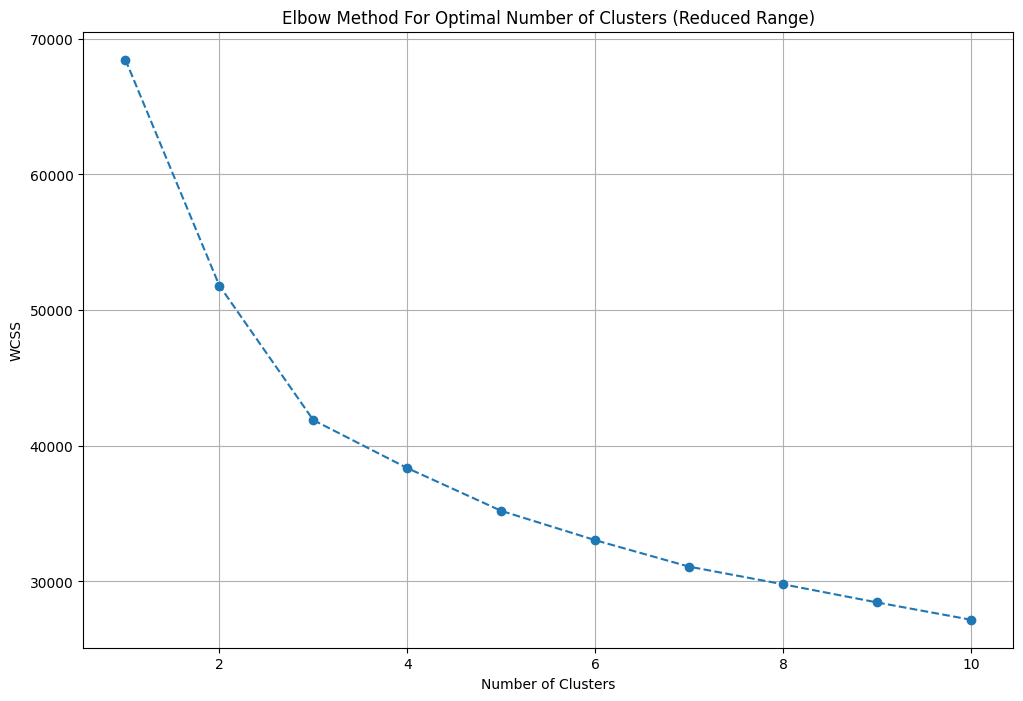

In [56]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

From above above graph, we use elbow method and we got optimal number of cluster = 3

In [ ]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [58]:
df = df.iloc[:,:-18]

In [59]:
df['furnishing_type'] = cluster_assignments

In [60]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1902,"['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '15 ...",2
2427,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",0
1605,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",0
2946,NaN,0
1535,"['3 Wardrobe', '5 Fan', '2 Geyser', '7 Light',...",2


# **5.features**

In [61]:
df[['society','features']].sample(5)

,society,features
1884,raheja vedaanta,NaN
1726,maa bhagwati residency,"['Feng Shui / Vaastu Compliant', 'Security / F..."
2676,shree kirpalu gi sector 52,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
594,orchid petals,"['Power Back-up', 'Feng Shui / Vaastu Complian..."
551,sobha city,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."


In [62]:
df['features'].isnull().sum()

635

* In our dataset we have some null values in features columns so we use apartments data from which we filled that fetaures null values so that null values filled with that society Features

In [64]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."


In [65]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [66]:
temp_df = df[df['features'].isnull()]

In [68]:
temp_df.shape

(635, 26)

In [69]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [70]:
df.loc[temp_df.index,'features'] = x.values

In [71]:
df['features'].isnull().sum()

481

In [72]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [74]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [75]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,...,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2487,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
features_binary_df.shape

(3803, 130)

In [77]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

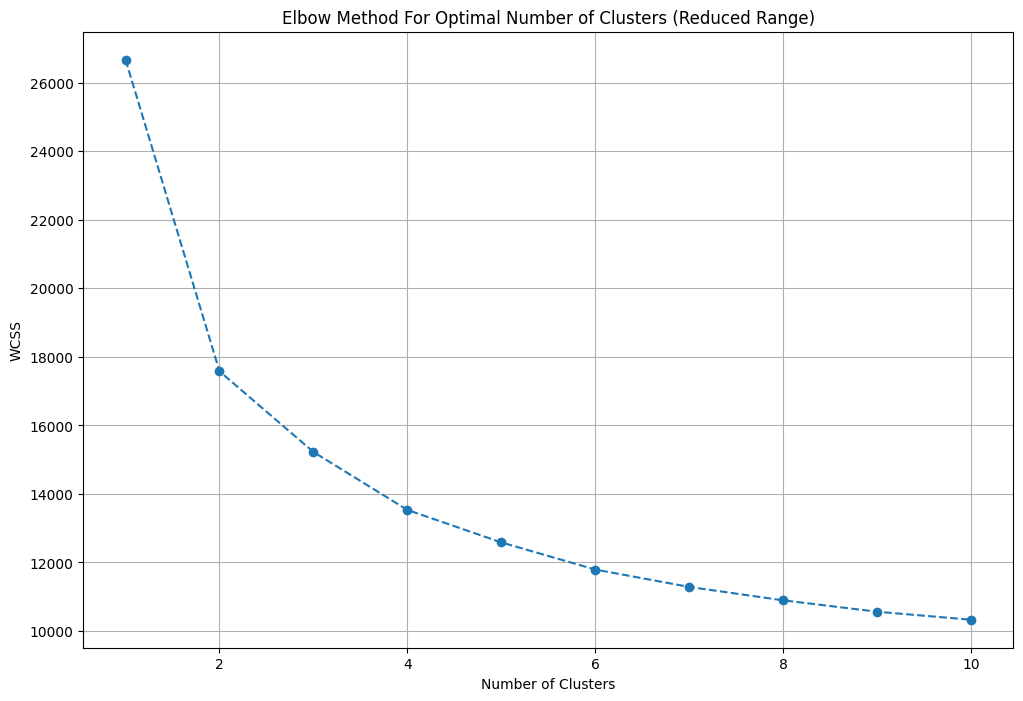

In [78]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [80]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [81]:
df['luxury_score'] = luxury_score

In [82]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,...,NaN,543.57695,0,0,0,0,0,0,"[Security / Fire Alarm, Lift(s), Maintenance S...",37
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,...,NaN,NaN,0,0,0,0,0,0,"[Intercom Facility, Lift(s), Swimming Pool, Pa...",38
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,...,NaN,1950.00000,0,1,0,0,0,0,"[Water purifier, Centrally Air Conditioned, Se...",150
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,...,1771.32,1302.01000,1,0,0,0,0,2,"[Security / Fire Alarm, Power Back-up, Interco...",75
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,...,359.00,NaN,1,1,0,0,0,2,"[Feng Shui / Vaastu Compliant, Private Garden ...",102


In [83]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [84]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1981,flat,ashiana anmol,sohna road,0.88,11125.0,791.0,Super Built up area 1275(118.45 sq.m.)Carpet a...,2,2,2,...,1275.0,NaN,791.0,0,0,0,0,0,1,127
197,flat,signature global synera,sector 81,0.50,6802.0,735.0,Super Built up area 735(68.28 sq.m.)Built Up a...,2,2,3,...,735.0,700.0,635.0,0,0,0,0,0,0,117
2763,house,vipul tatvam villa,sector 48,8.50,21250.0,4000.0,Plot area 4000(371.61 sq.m.),4,5,3+,...,NaN,4000.0,NaN,1,1,0,1,1,2,49
1386,flat,apex our homes,sector 37c,0.35,3783.0,925.0,Super Built up area 925(85.94 sq.m.)Built Up a...,2,2,1,...,925.0,850.0,800.0,0,0,0,0,0,2,158
3631,flat,sidhartha ncr one phase,sector 95,0.56,4105.0,1364.0,Super Built up area 1364(126.72 sq.m.),2,2,2,...,1364.0,NaN,NaN,0,0,0,0,0,2,60


In [85]:
df.shape

(3803, 23)

In [86]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)